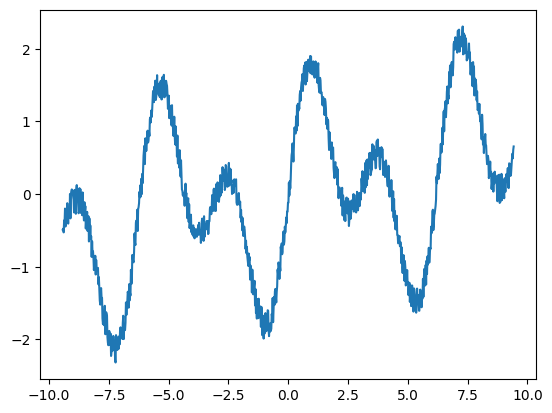

In [12]:
# 参考「【Tensorflow2】Kerasで単純なRNN（リカレントニューラルネットワーク）を試す」
# https://www.tcom242242.net/entry/python-basic/keras/keras%E3%81%A7%E5%8D%98%E7%B4%94%E3%81%AArnn%EF%BC%88%E3%83%AA%E3%82%AB%E3%83%AC%E3%83%B3%E3%83%88%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF/

import numpy as np
import matplotlib.pyplot as plt
import random

# -3piから3piまでの区間に1000点設定し、各点のsinの値に乱数を加えた系列を作成
x = np.linspace(-3*np.pi,3*np.pi,1000)
y = np.sin(x) + np.sin(2*x) + x * 0.05
for i in range(len(x)):
    y[i] = y[i] + random.uniform(-0.2,0.2)
plt.plot(x, y) 
plt.show()

In [13]:
# 指定した長さの入力に基づきその次の値を予測するようにデータを準備
input_len = 5 
X, Y = [], []
for i, _ in enumerate(x):
    if (i+input_len+1 >= len(x)):
        break
    X.append(y[i:i+input_len])
    Y.append(y[i+input_len+1])

In [14]:
# データを学習用(先頭から80%)と検証用(残り)に分割
split_index = int(len(X)*0.8)
train_x = X[:split_index]
train_y = Y[:split_index]
test_x = X[split_index:]
test_y = Y[split_index:]
train_x = np.array(train_x).reshape(len(train_x),-1,1)
test_x = np.array(test_x).reshape(len(test_x), -1, 1)
train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

In [15]:
from keras.layers import Dense, Activation, SimpleRNN, LSTM
from keras.models import Sequential

# RNNモデルを作成
input_shape = (len(train_x[0]), 1)
model = Sequential()
model.add(SimpleRNN(5, return_sequences=False, input_shape=input_shape))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


7/7 [==============================] - 0s 754us/step


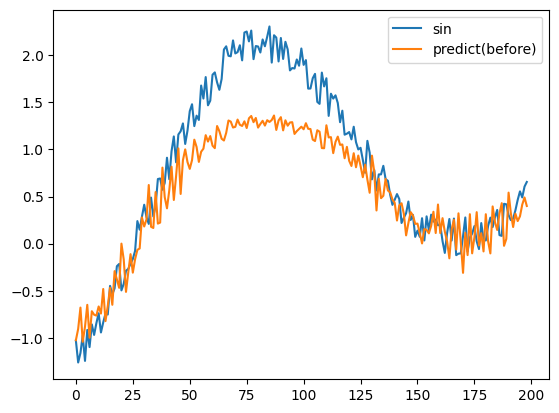

In [16]:
# 学習前のモデルで予測した場合の結果をプロット
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
plt.plot(np.arange(len(test_y)), predict_y, label="predict(before)")
plt.legend()
plt.show()

7/7 [==============================] - 0s 905us/step - loss: 0.0380
0.03799021616578102


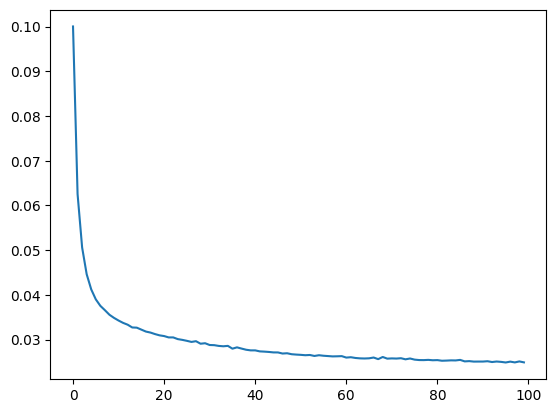

In [17]:
# 学習
hist = model.fit(train_x, train_y, batch_size=32, epochs=100, verbose=0)
history = hist.history
plt.plot(hist.epoch, history["loss"], label="loss")
score = model.evaluate(test_x, test_y)
print(score)

7/7 [==============================] - 0s 839us/step


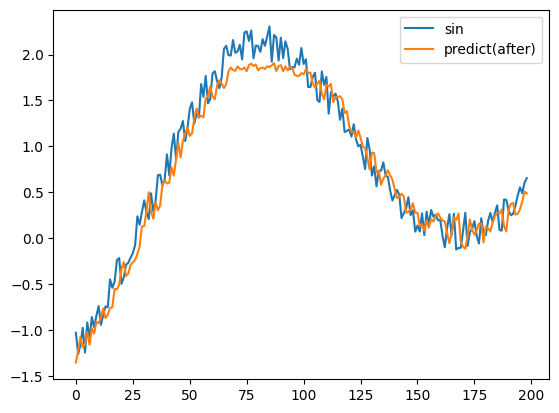

In [18]:
# 学習したモデルで予測
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
plt.plot(np.arange(len(test_y)), predict_y, label="predict(after)")
plt.legend()
plt.show()

In [19]:
from keras.layers import Dense, Activation, SimpleRNN, LSTM
from keras.models import Sequential

# LSTMモデルを作成
input_shape = (len(train_x[0]), 1)
model = Sequential()
model.add(LSTM(5, return_sequences=False, input_shape=input_shape))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


7/7 [==============================] - 0s 751us/step


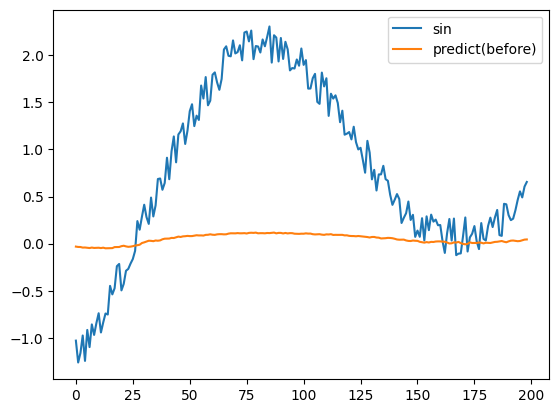

In [20]:
# 学習前のモデルで予測した結果をプロット
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
plt.plot(np.arange(len(test_y)), predict_y, label="predict(before)")
plt.legend()
plt.show()

7/7 [==============================] - 0s 934us/step - loss: 0.0365
0.03647853061556816


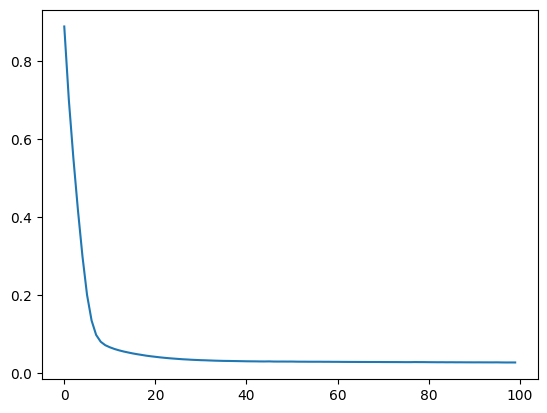

In [21]:
# 学習
hist = model.fit(train_x, train_y, batch_size=32, epochs=100, verbose=0)
history = hist.history
plt.plot(hist.epoch, history["loss"], label="loss")
score = model.evaluate(test_x, test_y)
print(score)

7/7 [==============================] - 0s 751us/step


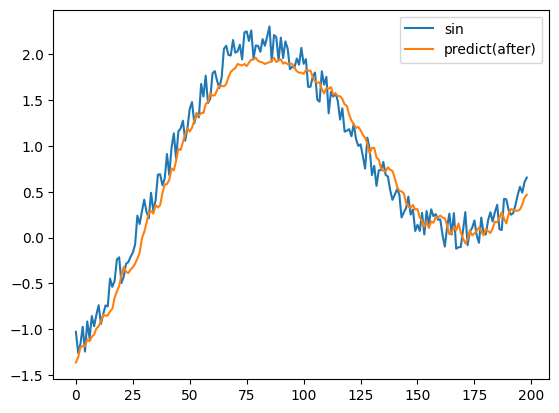

In [22]:
# 学習したモデルで予測した結果をプロット
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
plt.plot(np.arange(len(test_y)), predict_y, label="predict(after)")
plt.legend()
plt.show()